In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [38]:
os.chdir('C:/Users/cspru/Desktop/CSC 8633 - Group Project/anonymisedData/')

In [39]:
df_assessments = pd.read_csv("assessments.csv")
df_courses = pd.read_csv("courses.csv")
df_vle = pd.read_csv("vle.csv")
df_sa = pd.read_csv("studentAssessment.csv")
df_si = pd.read_csv("studentInfo.csv")
df_sr = pd.read_csv("studentRegistration.csv")
df_sv = pd.read_csv("studentVle.csv")

In [40]:
df_si.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [41]:
df_vle.head()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


### Number of attempts by students

In [42]:
student_attempt_credit_df = df_si[['id_student', 'num_of_prev_attempts', 'studied_credits']].groupby('id_student').median()

D:\Anaconda\envs\spyder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


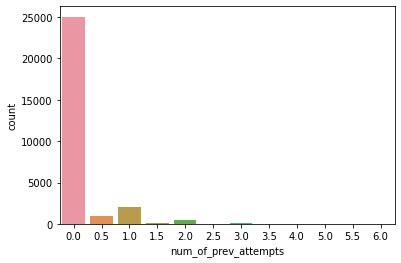

In [43]:
sns.countplot(student_attempt_credit_df.num_of_prev_attempts);

### Check for the popular courses

D:\Anaconda\envs\spyder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='code_module', ylabel='count'>

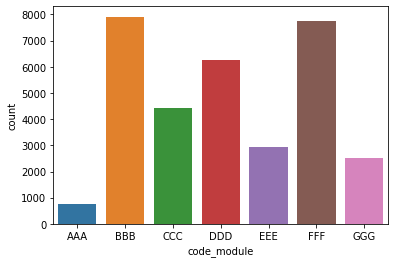

In [44]:
sns.countplot(df_si.code_module)

### Count of various Activity Types

In [45]:
studentVle_df = df_sv.merge(df_vle, on = 'id_site', how = 'left')

D:\Anaconda\envs\spyder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'forumng'),
  Text(1, 0, 'homepage'),
  Text(2, 0, 'oucontent'),
  Text(3, 0, 'subpage'),
  Text(4, 0, 'url'),
  Text(5, 0, 'resource'),
  Text(6, 0, 'glossary'),
  Text(7, 0, 'dataplus'),
  Text(8, 0, 'oucollaborate'),
  Text(9, 0, 'quiz'),
  Text(10, 0, 'ouelluminate'),
  Text(11, 0, 'sharedsubpage'),
  Text(12, 0, 'questionnaire'),
  Text(13, 0, 'page'),
  Text(14, 0, 'externalquiz'),
  Text(15, 0, 'ouwiki'),
  Text(16, 0, 'dualpane'),
  Text(17, 0, 'repeatactivity'),
  Text(18, 0, 'folder'),
  Text(19, 0, 'htmlactivity')])

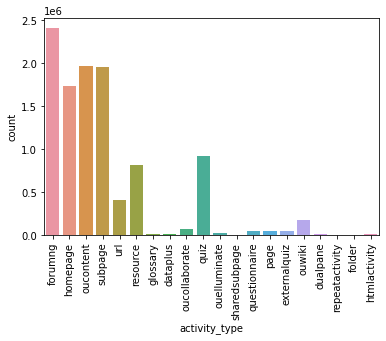

In [46]:
sns.countplot(studentVle_df.activity_type)
plt.xticks(rotation = 90)

### Performance of student based on disability

In [47]:
# Mergeing student registration and course info files using inner join
df_sr_courses = pd.merge(df_sr, df_courses, on=['code_module', 'code_presentation'], how='inner')

# Displaying merged data
df_sr_courses.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration,module_presentation_length
0,AAA,2013J,11391,-159.0,NaN,268
1,AAA,2013J,28400,-53.0,NaN,268
2,AAA,2013J,30268,-92.0,12.0,268
3,AAA,2013J,31604,-52.0,NaN,268
4,AAA,2013J,32885,-176.0,NaN,268


In [48]:
# Merging above merged file with student information
df_sr_courses_si = pd.merge(df_sr_courses, df_si, on=['code_module', 'code_presentation', 'id_student'], how='inner')

df_sr_courses_si.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration,module_presentation_length,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,-159.0,NaN,268,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,-53.0,NaN,268,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,-92.0,12.0,268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,-52.0,NaN,268,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,-176.0,NaN,268,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [49]:
# merging assessment info. and student assesment info. files using inner join
df_assessments_sa = pd.merge(df_assessments, df_sa, on=['id_assessment'], how='inner')

# Displaying
df_assessments_sa.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score
0,AAA,2013J,1752,TMA,19.0,10.0,11391,18,0,78.0
1,AAA,2013J,1752,TMA,19.0,10.0,28400,22,0,70.0
2,AAA,2013J,1752,TMA,19.0,10.0,31604,17,0,72.0
3,AAA,2013J,1752,TMA,19.0,10.0,32885,26,0,69.0
4,AAA,2013J,1752,TMA,19.0,10.0,38053,19,0,79.0


In [50]:
# merging using inner join
df_final = pd.merge(df_sr_courses_si, df_assessments_sa, on=['code_module', 'code_presentation', 'id_student'], how='inner')

# Displaying
df_final.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration,module_presentation_length,gender,region,highest_education,imd_band,...,studied_credits,disability,final_result,id_assessment,assessment_type,date,weight,date_submitted,is_banked,score
0,AAA,2013J,11391,-159.0,NaN,268,M,East Anglian Region,HE Qualification,90-100%,...,240,N,Pass,1752,TMA,19.0,10.0,18,0,78.0
1,AAA,2013J,11391,-159.0,NaN,268,M,East Anglian Region,HE Qualification,90-100%,...,240,N,Pass,1753,TMA,54.0,20.0,53,0,85.0
2,AAA,2013J,11391,-159.0,NaN,268,M,East Anglian Region,HE Qualification,90-100%,...,240,N,Pass,1754,TMA,117.0,20.0,115,0,80.0
3,AAA,2013J,11391,-159.0,NaN,268,M,East Anglian Region,HE Qualification,90-100%,...,240,N,Pass,1755,TMA,166.0,20.0,164,0,85.0
4,AAA,2013J,11391,-159.0,NaN,268,M,East Anglian Region,HE Qualification,90-100%,...,240,N,Pass,1756,TMA,215.0,30.0,212,0,82.0


Text(0, 0.5, '')

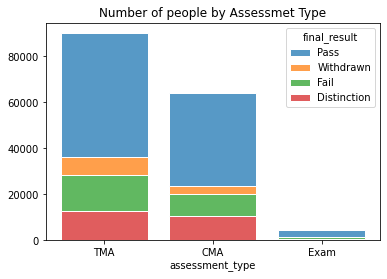

In [51]:
ax = sns.histplot(
    df_final[(df_final['disability'] == 'N')],
    x='assessment_type',
    hue='final_result',
    multiple='stack',
    edgecolor='white',
    # Shrink the bars a bit so they don't touch.
    shrink=0.8
)

ax.set_title('Number of people by Assessmet Type')
# Remove 'Count' ylabel.
ax.set_ylabel(None)

Text(0, 0.5, '')

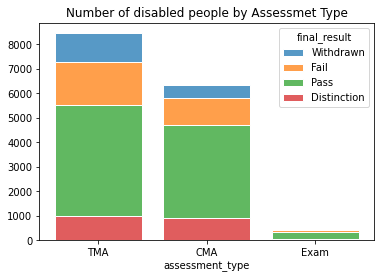

In [52]:
ax = sns.histplot(
    df_final[(df_final['disability'] == 'Y')],
    x='assessment_type',
    # Use the value variable here to turn histogram counts into weighted
    # values.
    # weights='final_result',
    hue='final_result',
    multiple='stack',
    # palette=['#24b1d1', '#ae24d1'],
    # Add white borders to the bars.
    edgecolor='white',
    # Shrink the bars a bit so they don't touch.
    shrink=0.8
)

ax.set_title('Number of disabled people by Assessmet Type')
# Remove 'Count' ylabel.
ax.set_ylabel(None)

From the above twp reports, it is observed that, we observe almost similar results for withdrawn, fail, pass, distinction whether a student is disable or not